---
Red Wine Quality Prediction
---



Dataset Description : Use Machine Learning Algorithms to determine which physiochemical properties make a wine 'good'?

Steps:



(1) Importing Packages

(2) Loading Dataset

(3) Plotting Graphs

(4) Preprocessing dataset

(5) Creating ML Model

(6) Tuning


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


**Loading** **Dataset**

In [ ]:
wine_df = pd.read_csv("winequality-red.csv",sep=';')
print("Dataset Shape: ", wine_df.shape)

#Checking Data Distribution
wine_df.head()

Dataset Shape:  (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Plotting Graphs for Better Insights to Data Distribution**

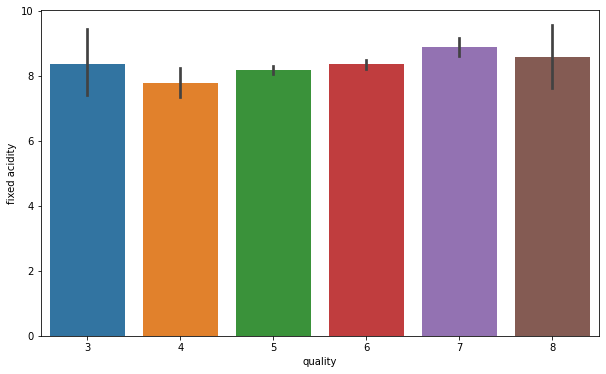

In [ ]:
#fixed acidity v/s quality
plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y='fixed acidity', data = wine_df)

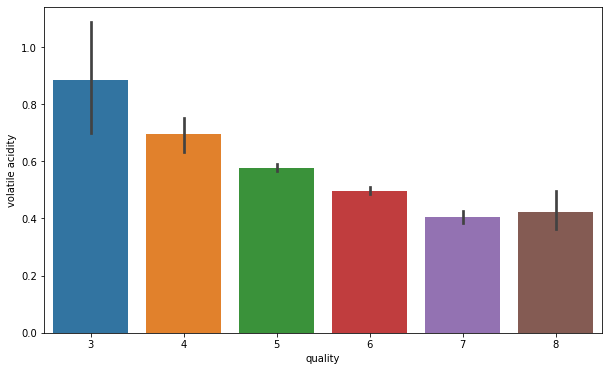

In [ ]:
#volatile acidity v/s quality
plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y='volatile acidity', data = wine_df)

####There is a "decreasing trend" in the above plot. 

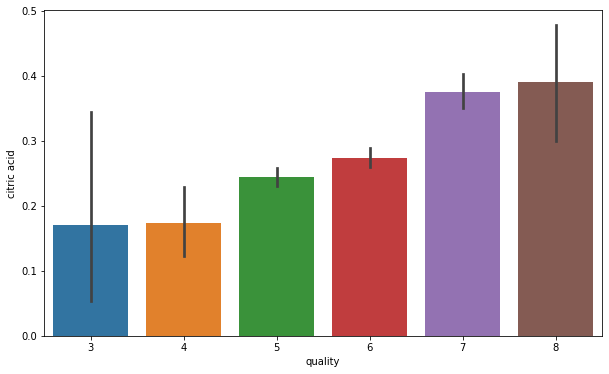

In [ ]:
#citric acid v/s quality
plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y='citric acid', data = wine_df)

####There is an "increasing trend" in the above plot.

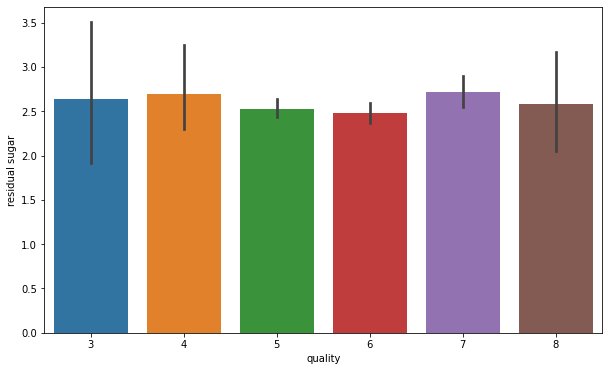

In [ ]:
#Residual Sugar v/s quality
plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y='residual sugar', data = wine_df)

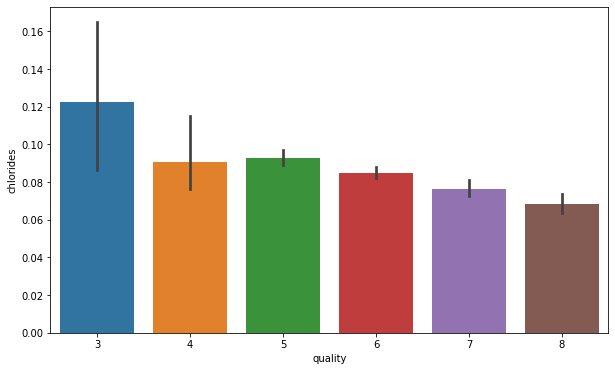

In [ ]:
#chlorides v/s quality
plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y='chlorides', data = wine_df)

####There is a "Decreasing Trend" in the above plot.

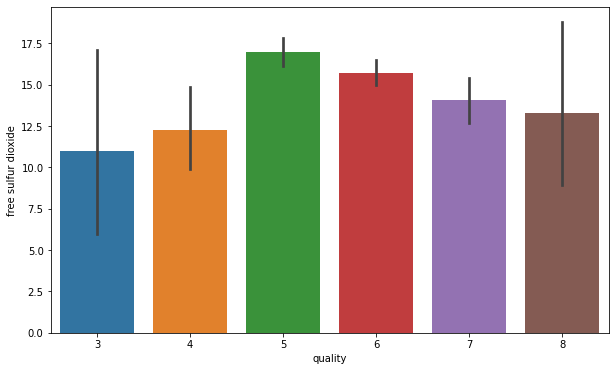

In [ ]:
#free sulfur dioxide v/s quality
plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y='free sulfur dioxide', data = wine_df)

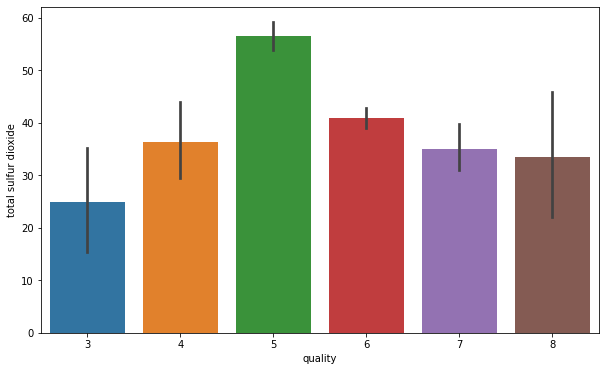

In [ ]:
#total sulfur dioxide v/s quality
plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y='total sulfur dioxide', data = wine_df)

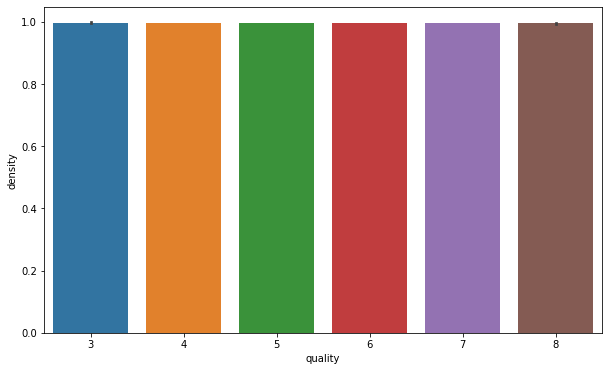

In [ ]:
#density v/s quality
plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y='density', data = wine_df)

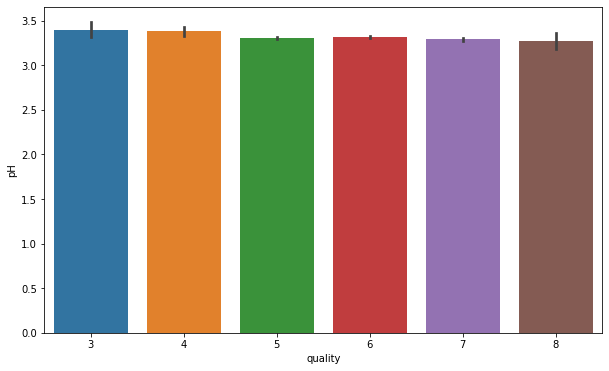

In [ ]:
#pH v/s quality
plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y='pH', data = wine_df)

####There is a "decreasing trend" in the above plot.

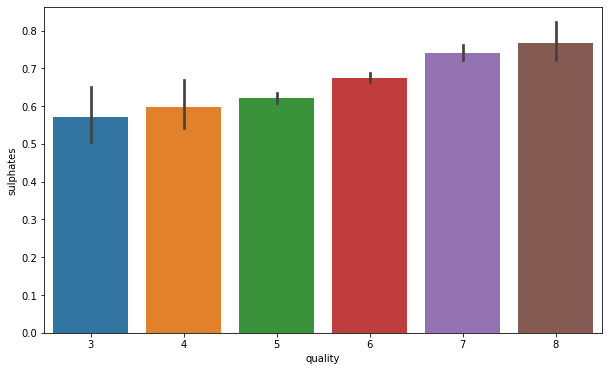

In [ ]:
#sulphates v/s quality
plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y='sulphates', data = wine_df)

####There is an "Increasing Trend" in the above plot.

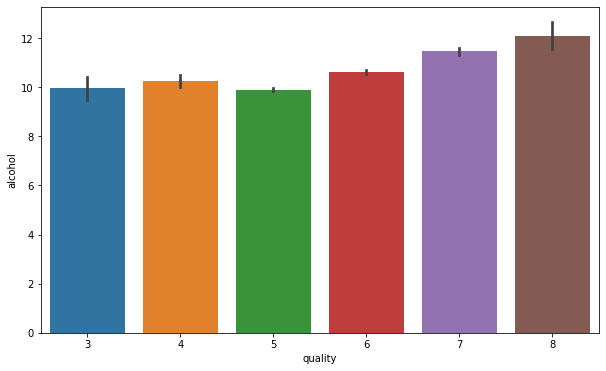

In [ ]:
#alcohol v/s quality
plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y='alcohol', data = wine_df)

####There is an "increasing Trend" in the above plot.

**PRE-PROCESSING DATA FOR ML ALGORITHM**

In [ ]:
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
#Classifying the wine quality as good or bad based on its quality
#"Bad" or 0 if quality of wine lies in the range(3,6){inclusive}
#"Good" or 1 if quality of wine lies in the range(7,8){inclusive}

wine_df['quality'] = wine_df['quality'].apply(lambda x: 1if x > 6.5 else 0)
wine_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


0    1382
1     217
Name: quality, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


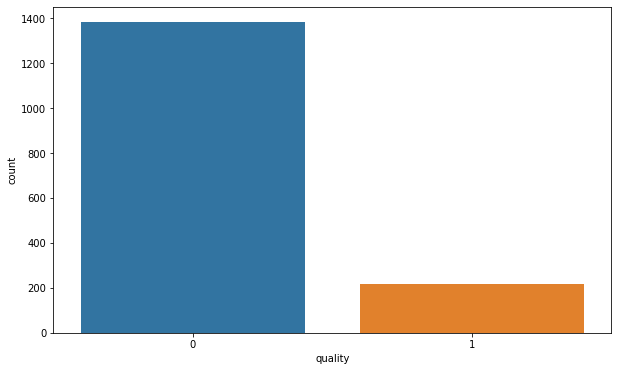

In [ ]:
print(wine_df['quality'].value_counts())

fig = plt.figure(figsize=(10,6))
sns.countplot(wine_df['quality'])

In [ ]:
#Seperating to Dependant and Independant Variables

x = wine_df.iloc[:,:-1].values
y = wine_df.iloc[:,-1].values

In [ ]:
#Splitting into train and test sets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

print("X-train Shape: ",x_train.shape)
print("X-test Shape: ",x_test.shape)
print("Y-train Shape: ",y_train.shape)
print("Y-test Shape: ",y_test.shape)

X-train Shape:  (1279, 11)
X-test Shape:  (320, 11)
Y-train Shape:  (1279,)
Y-test Shape:  (320,)


In [ ]:
# applying the standard scaling to the dataset to scale all the field values to same scale(approx.)
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#Creating ML Algorithms

###(1) Random Forest Classifier

In [ ]:
#Creating Random Forest Classifier Instance

rf_regressor = RandomForestClassifier(n_estimators=100)

#Fitting the classifier with training data
rf_regressor.fit(x_train, y_train)

# Predicting using classifier
y_pred = rf_regressor.predict(x_test)

[[262  11]
 [ 28  19]]


<Figure size 720x432 with 0 Axes>

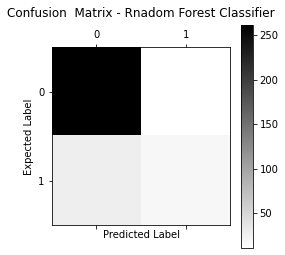

In [ ]:
#Confusion matrix using Random Forest Classifier
cm = confusion_matrix(y_test,y_pred)
print(cm)

#Matplot for confusion matrix for Random Forest Classifier
fig = plt.figure(figsize=(10,6))
plt.matshow(cm,cmap = plt.cm.binary,interpolation = 'nearest')
plt.title("Confusion  Matrix - Rnadom Forest Classifier\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()


In [ ]:
print("Total Predictions : ",len(y_pred))
print("Correct Predictions : ",sum(y_pred == y_test))
print("Incorrect Predictions : ",sum(y_pred != y_test))
print("Accuracy : ",sum(y_pred == y_test)*100 / len(y_pred), "%")

Total Predictions :  320
Correct Predictions :  281
Incorrect Predictions :  39
Accuracy :  87.8125 %


###(2) Support Vector Classifier

In [ ]:
#Support Vector Classifier Instance
svc_regressor = SVC()

#Fitting training data to support vector classifier
svc_regressor.fit(x_train,y_train)

#Predicting using support vector classifier
y_pred = svc_regressor.predict(x_test)

[[268   5]
 [ 35  12]]


<Figure size 720x432 with 0 Axes>

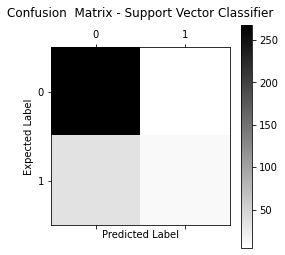

In [ ]:
#Confusion matrix using Random Forest Classifier
cm = confusion_matrix(y_test,y_pred)
print(cm)

#Matplot for confusion matrix for Random Forest Classifier
fig = plt.figure(figsize=(10,6))
plt.matshow(cm,cmap = plt.cm.binary,interpolation = 'nearest')
plt.title("Confusion  Matrix - Support Vector Classifier\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
print("Total Predictions : ",len(y_pred))
print("Correct Predictions : ",sum(y_pred == y_test))
print("Incorrect Predictions : ",sum(y_pred != y_test))
print("Accuracy : ",sum(y_pred == y_test)*100 / len(y_pred), "%")

Total Predictions :  320
Correct Predictions :  280
Incorrect Predictions :  40
Accuracy :  87.5 %


###Tuning Random Forest ML Model

In [ ]:
rf_eval = cross_val_score(estimator = rf_regressor, X = x_train,y = y_train,cv = 10)
rf_eval.mean()


0.9101131889763779

#RESULTS


1.   I created an ML Classifier for classifying wine into good and bad
2.   The SVM gave us an acuuracy of 87.5%
3.   The Random Forest gave us a higher accuracy of 87.8%.
4.   The best accuracy after tuning the Random Forest model is 91%.

